Shortest path: [5, 8]
Cost: 8


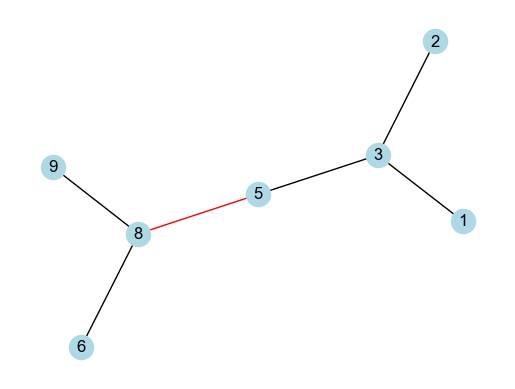

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

class Node:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

def ucs(start, goal):
    frontier = PriorityQueue()
    frontier.put((0, start))  # (priority, node)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while not frontier.empty():
        current = frontier.get()[1]

        if current == goal:
            break

        for neighbor in [current.left, current.right]:
            if neighbor:
                new_cost = cost_so_far[current] + neighbor.value
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    priority = new_cost
                    frontier.put((priority, neighbor))
                    came_from[neighbor] = current

    return came_from, cost_so_far

# Create the binary tree
#           5
#         /   \
#        3     8
#       / \   / \
#      2   1 6   9

root = Node(5)
root.left = Node(3, Node(2), Node(1))
root.right = Node(8, Node(6), Node(9))

# Apply UCS to find the shortest path from the root node to the right child
start = root
goal = root.right
came_from, cost_so_far = ucs(start, goal)

# Print the shortest path and its cost
path = [goal]
while path[-1] != start:
    path.append(came_from[path[-1]])
path.reverse()
print("Shortest path:", [node.value for node in path])
print("Cost:", cost_so_far[goal])

# Create the NetworkX graph
G = nx.Graph()

# Add nodes
for node in [root, root.left, root.right, root.left.left, root.left.right, root.right.left, root.right.right]:
    G.add_node(node.value)

# Add edges
G.add_edge(5, 3)
G.add_edge(5, 8)
G.add_edge(3, 2)
G.add_edge(3, 1)
G.add_edge(8, 6)
G.add_edge(8, 9)

# Mark the shortest path
path_edges = [(path[i].value, path[i+1].value) for i in range(len(path)-1)]
edge_colors = ['red' if e in path_edges else 'black' for e in G.edges()]

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edge_color=edge_colors)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='Arial')
plt.axis('off')
plt.show()


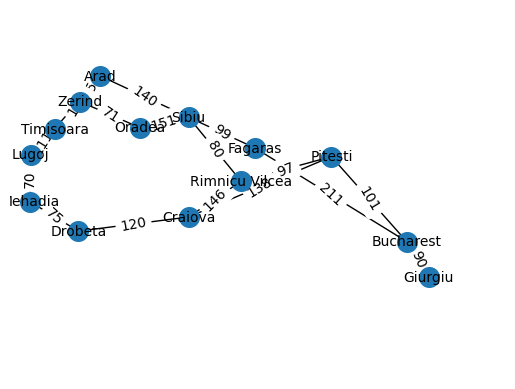

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add nodes to the graph
G.add_node("Arad", pos=(91, 492))
G.add_node("Zerind", pos=(71, 450))
G.add_node("Timisoara", pos=(45, 406))
G.add_node("Sibiu", pos=(180, 425))
G.add_node("Oradea", pos=(131, 408))
G.add_node("Lugoj", pos=(21, 364))
G.add_node("Fagaras", pos=(247, 375))
G.add_node("Rimnicu Vilcea", pos=(233, 321))
G.add_node("Mehadia", pos=(20, 288))
G.add_node("Pitesti", pos=(324, 361))
G.add_node("Drobeta", pos=(69, 240))
G.add_node("Craiova", pos=(180, 263))
G.add_node("Bucharest", pos=(400, 223))
G.add_node("Giurgiu", pos=(422, 165))

# Add edges to the graph
G.add_edge("Arad", "Zerind", weight=75)
G.add_edge("Arad", "Sibiu", weight=140)
G.add_edge("Arad", "Timisoara", weight=118)
G.add_edge("Zerind", "Oradea", weight=71)
G.add_edge("Sibiu", "Fagaras", weight=99)
G.add_edge("Sibiu", "Rimnicu Vilcea", weight=80)
G.add_edge("Oradea", "Sibiu", weight=151)
G.add_edge("Lugoj", "Mehadia", weight=70)
G.add_edge("Timisoara", "Lugoj", weight=111)
G.add_edge("Rimnicu Vilcea", "Pitesti", weight=97)
G.add_edge("Rimnicu Vilcea", "Craiova", weight=146)
G.add_edge("Mehadia", "Drobeta", weight=75)
G.add_edge("Craiova", "Drobeta", weight=120)
G.add_edge("Craiova", "Pitesti", weight=138)
G.add_edge("Pitesti", "Bucharest", weight=101)
G.add_edge("Bucharest", "Giurgiu", weight=90)
G.add_edge("Bucharest", "Fagaras", weight=211)

# Get node positions
pos = nx.get_node_attributes(G, 'pos')

# Get edge weights
edge_weights = nx.get_edge_attributes(G, 'weight')

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=200)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Set axis limits and show plot
plt.xlim([0, 500])
plt.ylim([0, 600])
plt.axis("off")
plt.show()

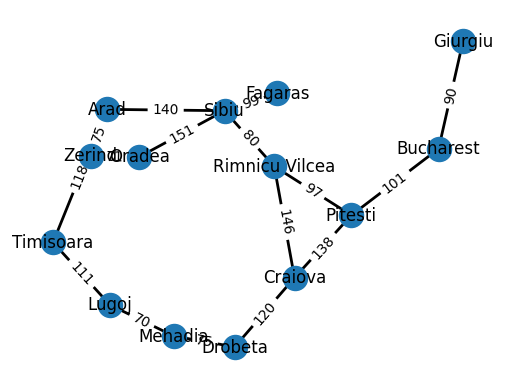

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()

# Add nodes
G.add_node("Arad", pos=(91, 492))
G.add_node("Zerind", pos=(75, 458))
G.add_node("Oradea", pos=(123, 457))
G.add_node("Sibiu", pos=(207, 491))
G.add_node("Fagaras", pos=(259, 504))
G.add_node("Rimnicu Vilcea", pos=(256, 450))
G.add_node("Timisoara", pos=(38, 394))
G.add_node("Lugoj", pos=(94, 348))
G.add_node("Mehadia", pos=(157, 325))
G.add_node("Drobeta", pos=(217, 317))
G.add_node("Craiova", pos=(276, 368))
G.add_node("Pitesti", pos=(332, 414))
G.add_node("Bucharest", pos=(418, 463))
G.add_node("Giurgiu", pos=(442, 542))

# Add edges
G.add_edge("Arad", "Zerind", weight=75)
G.add_edge("Arad", "Sibiu", weight=140)
G.add_edge("Arad", "Timisoara", weight=118)
G.add_edge("Zerind", "Oradea", weight=71)
G.add_edge("Oradea", "Sibiu", weight=151)
G.add_edge("Sibiu", "Fagaras", weight=99)
G.add_edge("Sibiu", "Rimnicu Vilcea", weight=80)
G.add_edge("Timisoara", "Lugoj", weight=111)
G.add_edge("Lugoj", "Mehadia", weight=70)
G.add_edge("Mehadia", "Drobeta", weight=75)
G.add_edge("Drobeta", "Craiova", weight=120)
G.add_edge("Craiova", "Rimnicu Vilcea", weight=146)
G.add_edge("Craiova", "Pitesti", weight=138)
G.add_edge("Rimnicu Vilcea", "Pitesti", weight=97)
G.add_edge("Pitesti", "Bucharest", weight=101)
G.add_edge("Bucharest", "Giurgiu", weight=90)

# Get node positions
pos = nx.get_node_attributes(G, "pos")

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=300)
nx.draw_networkx_edges(G, pos, width=2)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

# Draw edge weights
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_family="sans-serif")

# Set axis off and show plot
plt.axis("off")
plt.show()
